## Exploratory Data Analysis (EDA) in Python

### What is EDA?
Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics, often using visual methods. It is a crucial step in the data science process that helps us:

- Understand the structure of the data

- Identify patterns, trends, and anomalies

- Detect missing or incorrect values

- Decide on the next steps in data preprocessing or modeling

- EDA is not only about statistics—it combines visualization, summary statistics, and intuition to build a deep understanding of the data.

## Tools and Libraries Used in EDA
In Python, the most common libraries for EDA are:

+ pandas – for data manipulation

+ numpy – for numerical computations

+ matplotlib – for basic plotting

+ seaborn – for advanced and beautiful statistical plots

+ plotly – for interactive visualizations (optional)



### Step-by-Step EDA with Python Code
Let’s use a sample dataset: titanic (available in Seaborn library).

In [9]:
### Step 1: Load Libraries
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme
sns.set_theme(style="whitegrid")

In [10]:
#Step 2: Load the Dataset

# Load Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Display first few rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Step 3: Basic Information and Data Types



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
df.shape

(891, 15)

In [13]:
# Summary statistics for numerical columns

df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Summary statistics for categorical columns
df.describe(include=['O'])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


###  Step 4: Check Missing Values



In [15]:
# Total missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


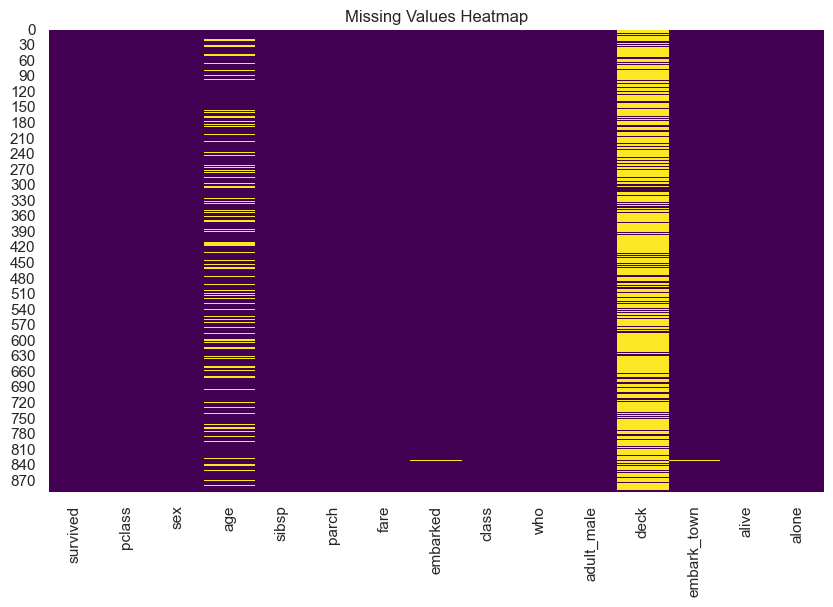

In [16]:
# Visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### Step 5: Univariate Analysis

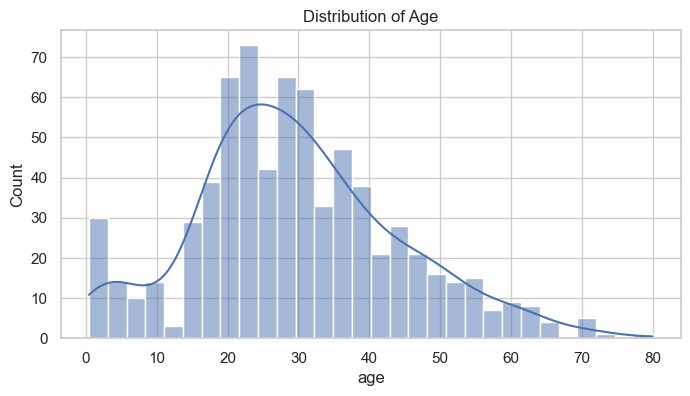

In [17]:
# Numerical Features

# Histogram of age
plt.figure(figsize=(8, 4))
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()

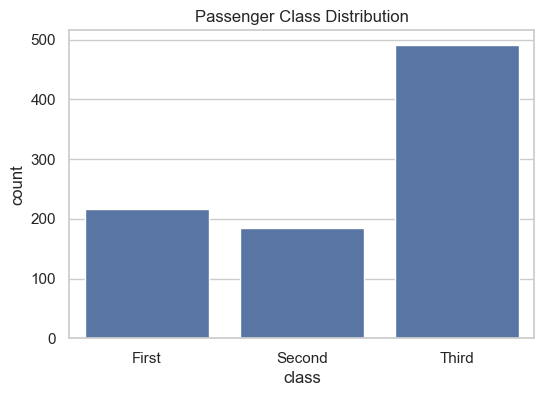

In [18]:
#Categorical Features

# Countplot for 'class'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class')
plt.title('Passenger Class Distribution')
plt.show()

### Step 6: Bivariate Analysis

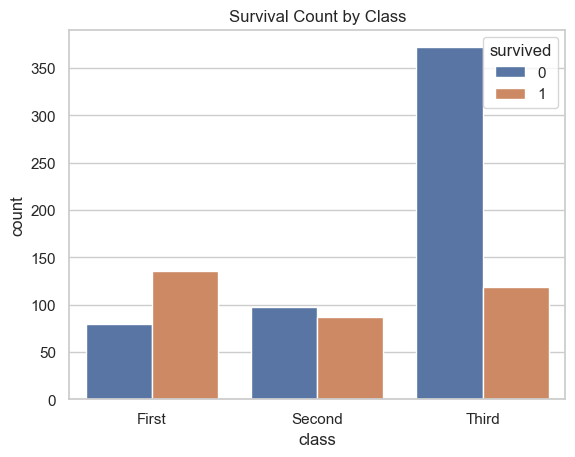

In [19]:
# Categorical vs Categorical

# Survival count based on class
sns.countplot(data=df, x='class', hue='survived')
plt.title("Survival Count by Class")
plt.show()

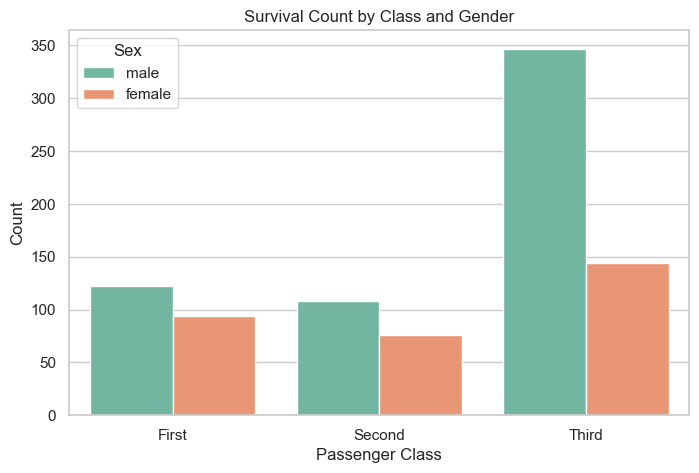

In [20]:
# Countplot of survival by class and gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='class', hue='sex', palette='Set2', hue_order=['male', 'female'], dodge=True)
plt.title('Survival Count by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

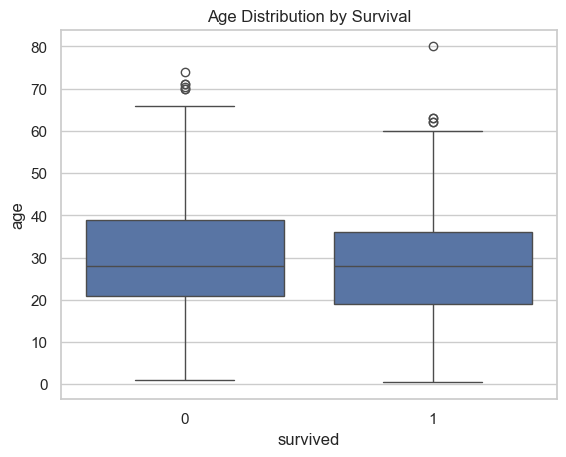

In [21]:
# Numerical vs Categorical

# Boxplot for age vs survived
sns.boxplot(data=df, x='survived', y='age')
plt.title("Age Distribution by Survival")
plt.show()

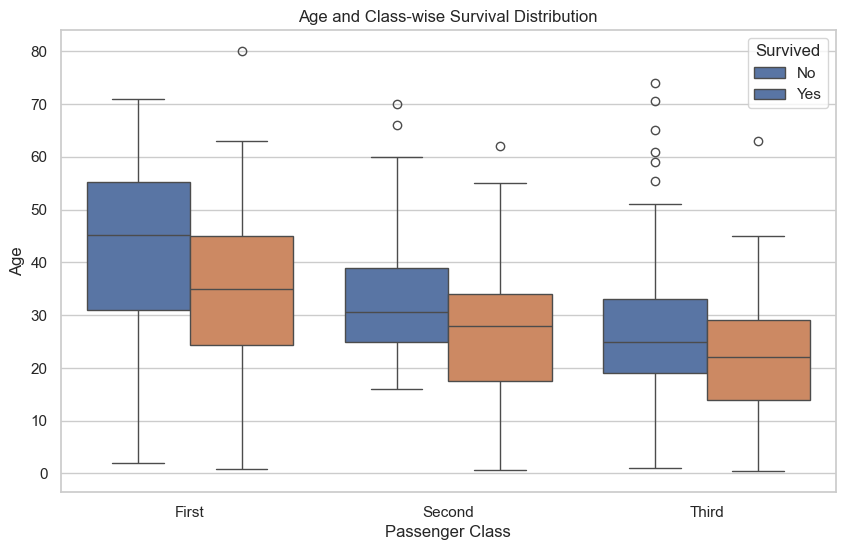

In [23]:
# Agewise and classwise survival analysis

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='class', y='age', hue='survived')
plt.title('Age and Class-wise Survival Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### Step 7: Correlation Analysis

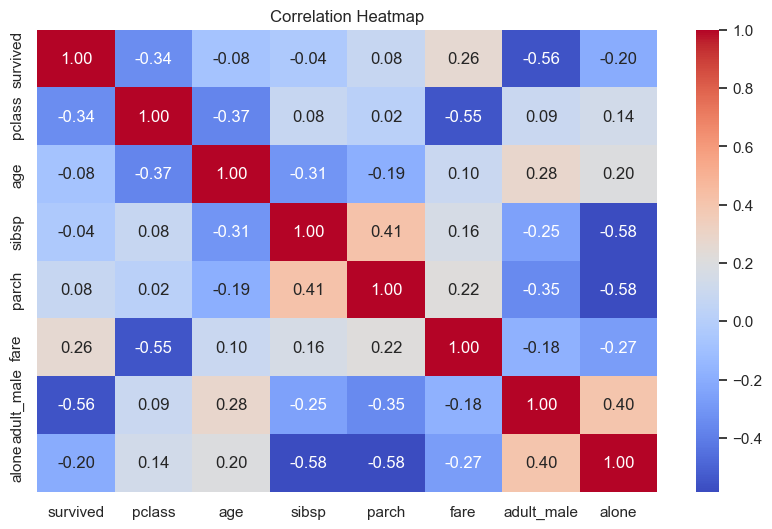

In [24]:
# Correlation heatmap for numerical values
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Step 8: Feature Relationships

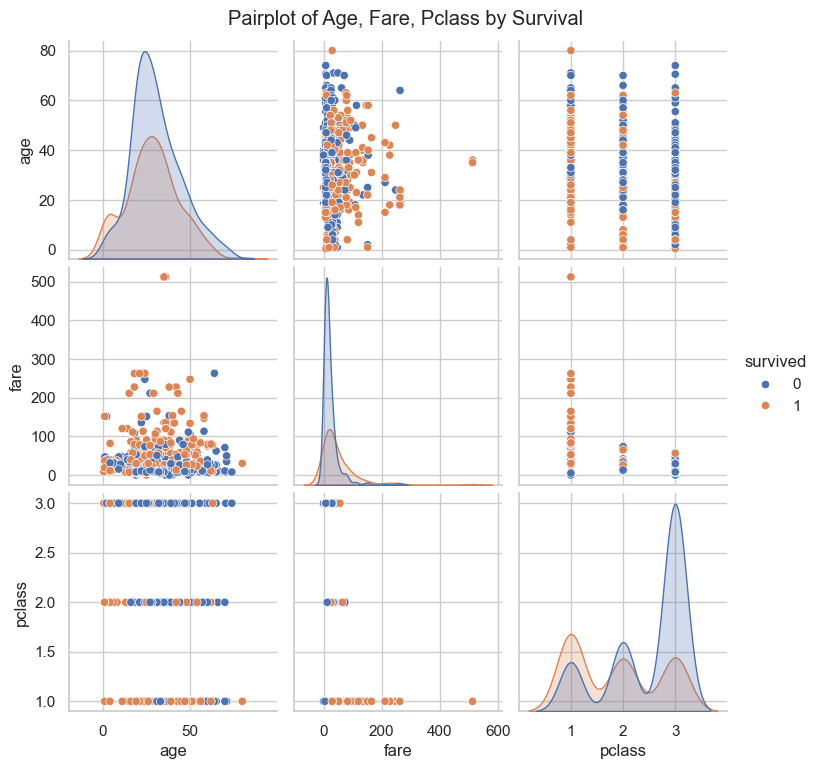

In [25]:
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']].dropna(), hue='survived')
plt.suptitle("Pairplot of Age, Fare, Pclass by Survival", y=1.02)
plt.show()

## Additional Tips for EDA
- Outlier Detection: Use boxplots or Z-score methods to identify extreme values.

- Feature Engineering: Derive new features from existing data (e.g., age groups).

- Data Cleaning: Impute missing values, remove duplicates, convert data types.

- Group Analysis: Use .groupby() to analyze patterns between    categories.



In [26]:
# Survival rate by gender
print(df.groupby('sex')['survived'].mean())

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


## Conclusion
EDA is a powerful process that sets the foundation for building robust machine learning models and making insightful decisions. By thoroughly exploring your data, you reduce the chances of poor assumptions and gain a strong understanding of the dataset’s structure.

## Next Steps
After EDA, you typically move on to:

+ Data Cleaning

+ Feature Engineering

+ Model Selection and Training

